<a href="https://colab.research.google.com/github/Ezemettler/PI2-DA/blob/main/EDA_PI2DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalamos la libreria yfinance

!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 897.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [2]:
# importamos librerias

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# ¿Qué es el S&P 500?

El Indice Standard & Poor's 500, más conocido como S&P500 , es un conjunto de las 500 mayores empresas que cotizan en las bolsas de Estados Unidos ponderadas según su capitalización bursátil.

In [3]:
# Traemos el listado de empresas del S&P500 
# el [0] trae la primer tabla que aparece en la web de wikipedia

empresas = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## Symbol ticker

El símbolo ticker o clave de pizarra es un código que hace referencia a las acciones de una compañía cotizada en un mercado de valores. 

Este código es único para las acciones de cada empresa, por lo que no habrá dos acciones de empresas diferentes con el mismo ticker.

In [4]:
# Pasamos los valores de la columna symbol a una lista
# Symbol es la abreviatura del n

lista_symbol = list(set(empresas.Symbol))
lista_symbol[0:5]     # Mostramos los primeros 5 valores de la lista

['IR', 'AXP', 'MNST', 'KLAC', 'MKTX']

In [6]:
# Vamos a traer por cada symbol, las cotizaciones desde el 2000-01-01 al 2022-12-31

data_list = []              # Creamos una lista donde vamos a guardar los datos descargados
for ticker in lista_symbol:
  data = yf.download(ticker, start='2000-01-01', end='2022-12-31')  # Descarga de datos de cada ticker en el período
  data['Symbol'] = ticker   # Creamos columna y agregamos el symbol de la compania
  data_list.append(data)    # Agregamos la data generada del ticker al final de la lista

df = pd.concat(data_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2017-05-12,21.250000,21.299999,20.270000,21.10,21.058140,10933700.0,IR
2017-05-15,21.010000,22.299999,21.010000,22.02,21.976316,3487300.0,IR
2017-05-16,22.190001,22.410000,22.049999,22.10,22.056158,1289300.0,IR
2017-05-17,22.150000,22.510000,21.670000,22.10,22.056158,1583700.0,IR
2017-05-18,22.190001,23.629999,21.980000,22.50,22.455364,4075200.0,IR


In [8]:
# Mostramos info relevante del dataframe generado.
# Cant de columnas y registros, tipos de datos por cada columna, espacio en memoria del dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2587986 entries, 2017-05-12 to 2022-12-30
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Adj Close  float64
 5   Volume     float64
 6   Symbol     object 
dtypes: float64(6), object(1)
memory usage: 158.0+ MB


In [9]:
# Verificamos valores faltantes en las columnas

df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [10]:
# % de Correlación de variables

df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999909,0.999899,0.999815,0.992691,-0.051687
High,0.999909,1.000000,0.999861,0.999909,0.992884,-0.051484
Low,0.999899,0.999861,1.000000,0.999911,0.992724,-0.051915
Close,0.999815,0.999909,0.999911,1.000000,0.992892,-0.051707
Adj Close,0.992691,0.992884,0.992724,0.992892,1.000000,-0.047918
Volume,-0.051687,-0.051484,-0.051915,-0.051707,-0.047918,1.000000


Text(0.5, 1.0, 'Correlación de variables')

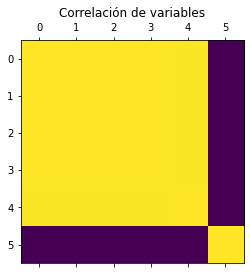

In [11]:
# Gráfico de correlación de variables

plt.matshow(df.corr())
plt.title('Correlación de variables')

## Precios historicos

Vamos a graficar el promedio de los valores de cierre totales de todas las companias, para tener una visión general de los mercados

In [12]:
# Agregamos una columna para la fecha

df['Date'] = df.index
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
Date,,,,,,,,
2017-05-12,21.250000,21.299999,20.270000,21.10,21.058140,10933700.0,IR,2017-05-12
2017-05-15,21.010000,22.299999,21.010000,22.02,21.976316,3487300.0,IR,2017-05-15
2017-05-16,22.190001,22.410000,22.049999,22.10,22.056158,1289300.0,IR,2017-05-16
2017-05-17,22.150000,22.510000,21.670000,22.10,22.056158,1583700.0,IR,2017-05-17
2017-05-18,22.190001,23.629999,21.980000,22.50,22.455364,4075200.0,IR,2017-05-18


In [13]:
# Reseteamos los indices

df.reset_index(drop = True, inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date
0,21.250000,21.299999,20.270000,21.10,21.058140,10933700.0,IR,2017-05-12
1,21.010000,22.299999,21.010000,22.02,21.976316,3487300.0,IR,2017-05-15
2,22.190001,22.410000,22.049999,22.10,22.056158,1289300.0,IR,2017-05-16
3,22.150000,22.510000,21.670000,22.10,22.056158,1583700.0,IR,2017-05-17
4,22.190001,23.629999,21.980000,22.50,22.455364,4075200.0,IR,2017-05-18


In [14]:
# Vamos a generar una columna con el año.mes para luego graficar

df['Year'] = df['Date'].dt.year
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year
0,21.250000,21.299999,20.270000,21.10,21.058140,10933700.0,IR,2017-05-12,2017
1,21.010000,22.299999,21.010000,22.02,21.976316,3487300.0,IR,2017-05-15,2017
2,22.190001,22.410000,22.049999,22.10,22.056158,1289300.0,IR,2017-05-16,2017
3,22.150000,22.510000,21.670000,22.10,22.056158,1583700.0,IR,2017-05-17,2017
4,22.190001,23.629999,21.980000,22.50,22.455364,4075200.0,IR,2017-05-18,2017


In [15]:
# Armamos un promedio de precios por año 

hist_price = df.groupby(['Year']).mean()
hist_price.head()

,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,
2000,33.499679,34.227973,32.744152,33.491234,21.788722,5.278260e+06
2001,31.631970,32.130436,31.097700,31.631751,20.181038,5.514821e+06
2002,28.936200,29.377756,28.451011,28.920444,18.856333,5.680944e+06
2003,28.677927,28.999709,28.346035,28.696562,19.230157,5.367761e+06
2004,34.919678,35.260026,34.584173,34.934846,23.973171,6.172277e+06


In [16]:
# Agregamos la columna año, y luego resetear el indice

hist_price['Year'] = hist_price.index
hist_price.reset_index(drop = True, inplace = True)
hist_price.head()

,Open,High,Low,Close,Adj Close,Volume,Year
0,33.499679,34.227973,32.744152,33.491234,21.788722,5.278260e+06,2000
1,31.631970,32.130436,31.097700,31.631751,20.181038,5.514821e+06,2001
2,28.936200,29.377756,28.451011,28.920444,18.856333,5.680944e+06,2002
3,28.677927,28.999709,28.346035,28.696562,19.230157,5.367761e+06,2003
4,34.919678,35.260026,34.584173,34.934846,23.973171,6.172277e+06,2004


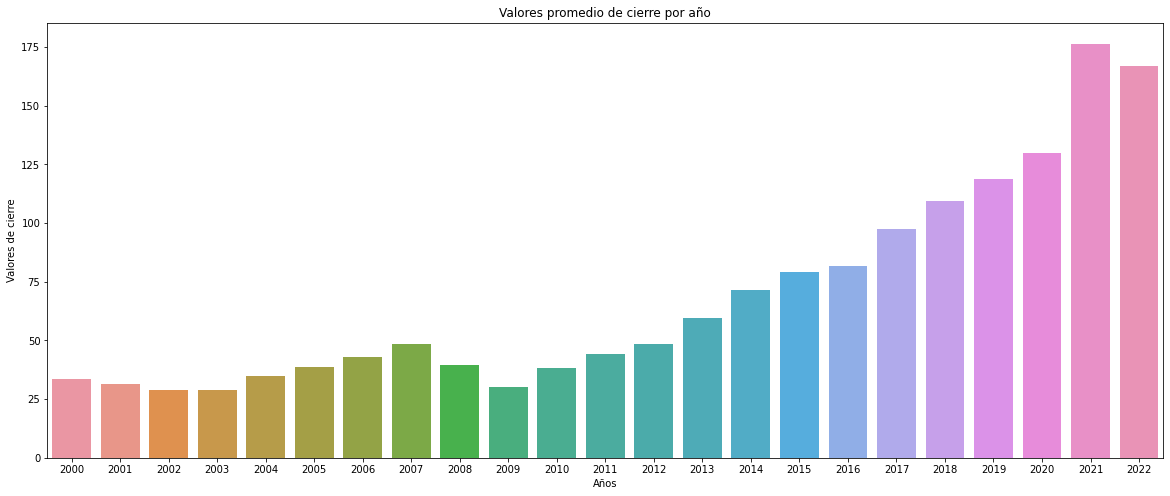

In [17]:
# Graficamos

plt.figure(figsize=(20, 8))       # Tamaño de gráfico
sns.barplot(x='Year', y='Close', data=hist_price) 
plt.title('Valores promedio de cierre por año')
plt.xlabel('Años')
plt.ylabel('Valores de cierre')
plt.show()

In [18]:
# Pico min
print("Precio prom de cierre")

min = hist_price['Close'].idxmin()
print("Min:", hist_price['Year'].iloc[min] )


# Pico max 
max = hist_price['Close'].idxmax()
print("Max:", hist_price['Year'].iloc[max] )

Precio prom de cierre
Min: 2003
Max: 2021


# Observaciones

## Períodos de baja

Notamos como el min de precio de cierre se da en el año 2003, luego del periodo de crisis llamado 'burbuja de las .com'.

\
También podemos observar en el periodo 2008/2009 vuelve a aparecer un periodo de baja del mercado, debido al colapso de la burbuja inmobiliaria en los Estados Unidos, que provocó aproximadamente en octubre de 2007 la llamada 'crisis de las hipotecas subprime'.

\
## Períodos de alta
En el año 2021 se da el pico máximo de los ultimos años, correspondiente al periodo de recuperación económica post covid.

\
# Presente
En el período presente, por lo que se ve que en 2022 ya hubo una baja con respecto al 2021, en parte debido a la suba de tasas de interés por parte de la reserva federal de los Estados Unidos para intentar frenar la inflación, lo que causa un período de recesión económica. 


# Relación entre tasas de interes Vs precio de acciones

Vamos a trabajar con los datos de las tasas de interes de la reserva federal de los Estados Unidos para sacar nuevas conclusiones.

In [19]:
# Vinculamos google colab con google drive para importar el dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Traemos el listado de tasas de interes de la fed
# fuente: https://datos.bancomundial.org/indicator/FR.INR.RINR?end=2021&locations=US&start=2000&view=chart

tasas_fed = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PI2 DA/tasas_usa.csv', sep=',', encoding='latin-1', decimal=',')
tasas_fed.head()

,year,tasa
0,2000,6.8
1,2001,4.6
2,2002,3.1
3,2003,2.1
4,2004,1.6


In [21]:
tasas_fed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    23 non-null     int64  
 1   tasa    23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


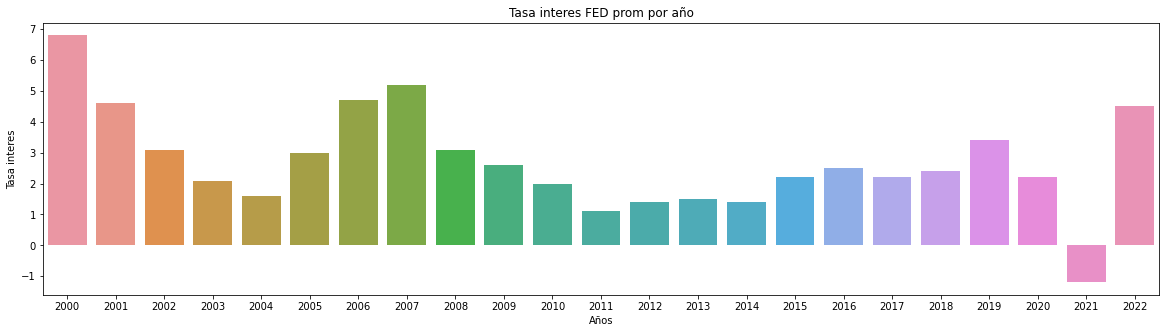

In [29]:
# Graficamos

plt.figure(figsize=(20, 5))       # Tamaño de gráfico
sns.barplot(x='year', y='tasa', data=tasas_fed) 
plt.title('Tasa interes FED prom por año')
plt.xlabel('Años')
plt.ylabel('Tasa interes')
plt.show()

La relación entre tasas de interes de la reserva federal de los EEUU y el precio de las acciones es simplificando, cuando las tasas suben, las acciones bajan y viceversa.

\
Podemos observar en los gáficos de tasas de interés y de precio de acciones (gráfico anterior), justamente en años donde las tasas son más altas, ese mismo año o el año siguiente sufre una perdida de valor en las acciones.

Ejemplos:
+ Año 2000: Tasa de interés alta, caida de precios de acciones hasta 2003.
+ Año 2004: Tasa de interés baja, subida de precios de acciones hasta 2007.
+ Año 2007: Tasa de interés alta, caida de precios de acciones hasta 2009.
+ Año 2011: Tasa de interés baja, subida d eprecios de acciones hasta 2020.


Si bien no es la única variable que afecta al precio de las acciones, es una variable que se cumple esa relación que mencionabamos al inicio.

\
En el año 2022 hubo un fuerte aumento de las tasas de interés, que sigue con la misma tendencia al inicio del año 2023, por lo cual, es posible que el precio de las acciones siga en baja.

Una alternativa de inversión que podría ser más rentable y de menor riesgo, es la compra de bonos.

## ¿Qué día de la semana es mejor para invertir?

In [32]:
# Agregamos una columna para obtener el dia de la semana

df['dayOfWeek'] = df['Date'].dt.day_name()

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year,dayOfWeek
0,21.250000,21.299999,20.270000,21.10,21.058140,10933700.0,IR,2017-05-12,2017,Friday
1,21.010000,22.299999,21.010000,22.02,21.976316,3487300.0,IR,2017-05-15,2017,Monday
2,22.190001,22.410000,22.049999,22.10,22.056158,1289300.0,IR,2017-05-16,2017,Tuesday
3,22.150000,22.510000,21.670000,22.10,22.056158,1583700.0,IR,2017-05-17,2017,Wednesday
4,22.190001,23.629999,21.980000,22.50,22.455364,4075200.0,IR,2017-05-18,2017,Thursday


In [35]:
df_byDate = df.sort_values('Date')
df_byDate.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year,dayOfWeek
941384,26.062500,26.062500,24.500000,24.531250,15.189514,1925600.0,GD,2000-01-03,2000,Monday
689261,17.312500,17.875000,17.312500,17.437500,13.786802,217000.0,RL,2000-01-03,2000,Monday
964532,23.500000,23.750000,23.031250,23.187500,13.709641,906400.0,HSY,2000-01-03,2000,Monday
1542266,31.156250,31.296875,27.906250,29.531250,24.477541,98114800.0,ORCL,2000-01-03,2000,Monday
2570740,25.666668,25.722221,24.000000,25.666668,16.364033,19442925.0,BBY,2000-01-03,2000,Monday
...,...,...,...,...,...,...,...,...,...,...
810677,135.479996,135.539993,133.850006,135.410004,135.410004,546900.0,DOV,2022-12-30,2022,Friday
2270885,156.929993,157.660004,155.240005,156.990005,155.621475,435700.0,MAA,2022-12-30,2022,Friday
816464,426.880005,429.739990,424.820007,428.760010,428.760010,759900.0,DE,2022-12-30,2022,Friday
827674,66.889999,66.989998,66.110001,66.650002,66.650002,4335300.0,MDLZ,2022-12-30,2022,Friday


In [37]:
df_byDate['saldo'] = df_byDate['Close'] - df_byDate['Open']
df_byDate.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Date,Year,dayOfWeek,saldo
941384,26.062500,26.062500,24.50000,24.531250,15.189514,1925600.0,GD,2000-01-03,2000,Monday,-1.53125
689261,17.312500,17.875000,17.31250,17.437500,13.786802,217000.0,RL,2000-01-03,2000,Monday,0.12500
964532,23.500000,23.750000,23.03125,23.187500,13.709641,906400.0,HSY,2000-01-03,2000,Monday,-0.31250
1542266,31.156250,31.296875,27.90625,29.531250,24.477541,98114800.0,ORCL,2000-01-03,2000,Monday,-1.62500
2570740,25.666668,25.722221,24.00000,25.666668,16.364033,19442925.0,BBY,2000-01-03,2000,Monday,0.00000


In [40]:
saldo_byDate = df_byDate.groupby('dayOfWeek').mean()
saldo_byDate

,Open,High,Low,Close,Adj Close,Volume,Year,saldo
dayOfWeek,,,,,,,,
Friday,71.940985,72.755520,71.069842,71.946436,63.519058,6.731933e+06,2011.603041,0.005451
Monday,71.783120,72.602822,70.911421,71.765777,63.343534,6.251396e+06,2011.584593,-0.017343
Thursday,72.002971,72.903216,71.120883,72.052995,63.631133,6.820993e+06,2011.630326,0.050023
Tuesday,72.101903,72.942774,71.223955,72.090617,63.678074,6.624687e+06,2011.632089,-0.011286
Wednesday,71.923734,72.800869,71.047839,71.933806,63.511330,6.795636e+06,2011.610994,0.010072


In [42]:
saldo_byDate['dayOfWeek'] = saldo_byDate.index
saldo_byDate.reset_index(drop=True, inplace=True)
saldo_byDate = saldo_byDate[ ['dayOfWeek', 'saldo'] ]
saldo_byDate

,dayOfWeek,saldo
0,Friday,0.005451
1,Monday,-0.017343
2,Thursday,0.050023
3,Tuesday,-0.011286
4,Wednesday,0.010072


In [43]:
saldo_byDate.sort_values('saldo', ascending=False)

,dayOfWeek,saldo
2,Thursday,0.050023
4,Wednesday,0.010072
0,Friday,0.005451
3,Tuesday,-0.011286
1,Monday,-0.017343


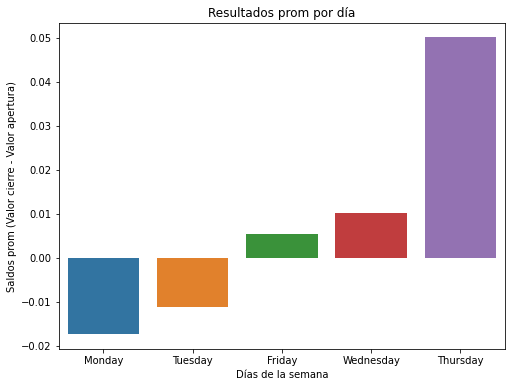

In [56]:
# Graficamos

plt.figure(figsize=(8, 6))       # Tamaño de gráfico
sns.barplot(x='dayOfWeek', y='saldo', data=saldo_byDate, order=saldo_byDate.sort_values('saldo').dayOfWeek) 
plt.title('Resultados prom por día')
plt.xlabel('Días de la semana')
plt.ylabel('Saldos prom (Valor cierre - Valor apertura)')
plt.show()

Sin dudas, el día que mejor resultados hubo fue el día Jueves.